<a href="https://colab.research.google.com/github/june1st/GoogleColab/blob/master/DensePoseOnGoogleColab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DensePoseTest

<table class="tfo-notebook-buttons" align="left" >
 <td>
<img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
  <td>
<img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
  </td>
</table>


In [0]:
#!pip install torch

# 環境構築
出力が長すぎるときは適宜 > /dev/null してください

## CUDAの差替え（9.2 → 9.0）

In [42]:
#現在のCUDAの確認（スクリプト作成時点で9.2）
!python -c 'import chainer; chainer.print_runtime_info()'

Platform: Linux-4.14.79+-x86_64-with-Ubuntu-18.04-bionic
Chainer: 5.0.0
NumPy: 1.14.6
CuPy:
  CuPy Version          : 5.0.0
  CUDA Root             : /usr/local/cuda
  CUDA Build Version    : 9020
  CUDA Driver Version   : 9020
  CUDA Runtime Version  : 9020
  cuDNN Build Version   : 7201
  cuDNN Version         : 7201
  NCCL Build Version    : 2213
iDeep: 2.0.0.post3


In [3]:
#CUDA9.0のダウンロードとインストール
!wget http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/cuda-repo-ubuntu1604_9.0.176-1_amd64.deb
!dpkg -i --force-confnew cuda-repo-ubuntu1604_9.0.176-1_amd64.deb
!apt-key adv --fetch-keys http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/7fa2af80.pub
!apt-get update
!apt-get install cuda-9-0

--2019-01-17 07:46:19--  http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/cuda-repo-ubuntu1604_9.0.176-1_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 192.229.221.58, 2606:2800:233:ef6:15dd:1ece:1d50:1e1
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|192.229.221.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2838 (2.8K) [application/x-deb]
Saving to: ‘cuda-repo-ubuntu1604_9.0.176-1_amd64.deb’

cuda-repo-ubuntu160 100%[===================>]   2.77K  --.-KB/s    in 0s      

2019-01-17 07:46:19 (422 MB/s) - ‘cuda-repo-ubuntu1604_9.0.176-1_amd64.deb’ saved [2838/2838]

Selecting previously unselected package cuda-repo-ubuntu1604.
(Reading database ... 110851 files and directories currently installed.)
Preparing to unpack cuda-repo-ubuntu1604_9.0.176-1_amd64.deb ...
Unpacking cuda-repo-ubuntu1604 (9.0.176-1) ...
Setting up cuda-repo-ubuntu1604 (9.0.176-1) ...

Configura

In [4]:
# CUDA9.0が入ったか確認
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2017 NVIDIA Corporation
Built on Fri_Sep__1_21:08:03_CDT_2017
Cuda compilation tools, release 9.0, V9.0.176


## 依存ライブラリのインストール

In [5]:
  !apt install libprotobuf-dev libleveldb-dev libsnappy-dev libopencv-dev libhdf5-serial-dev protobuf-compiler
  !apt install --no-install-recommends libboost-all-dev
  !apt install libopenblas-dev
  !apt install libgflags-dev libgoogle-glog-dev liblmdb-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
libopencv-dev is already the newest version (3.2.0+dfsg-4ubuntu0.1).
Suggested packages:
  leveldb-doc
The following NEW packages will be installed:
  libhdf5-serial-dev libleveldb-dev libleveldb1v5 libprotobuf-dev
  libprotobuf-lite10 libsnappy-dev
0 upgraded, 6 newly installed, 0 to remove and 54 not upgraded.
Need to get 1,400 kB of archives.
After this operation, 9,964 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libhdf5-serial-dev all 1.10.0-patch1+docs-4 [2,898 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libleveldb1v5 amd64 1.20-2 [136 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libleveldb-dev amd64 1.20-2 [177 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 libprotobuf-lite10 amd64 3.0.0-9.1ubuntu1 [97.7 kB]
Get:5 h

In [6]:
# libhdf5のシンボリックリンク作成（バージョン変わったらlsで確認してください）
!ls /usr/lib/x86_64-linux-gnu/libhdf5_serial*
# 念のため先に unlink しておく
!unlink /usr/lib/x86_64-linux-gnu/libhdf5.so
!unlink /usr/lib/x86_64-linux-gnu/libhdf5_hl.so
!sudo ln -s /usr/lib/x86_64-linux-gnu/libhdf5_serial.so.100.0.1 /usr/lib/x86_64-linux-gnu/libhdf5.so
!sudo ln -s /usr/lib/x86_64-linux-gnu/libhdf5_serial_hl.so.100.0.0 /usr/lib/x86_64-linux-gnu/libhdf5_hl.so

/usr/lib/x86_64-linux-gnu/libhdf5_serial.a
/usr/lib/x86_64-linux-gnu/libhdf5_serial_fortran.a
/usr/lib/x86_64-linux-gnu/libhdf5_serial_fortran.so
/usr/lib/x86_64-linux-gnu/libhdf5_serial_fortran.so.100
/usr/lib/x86_64-linux-gnu/libhdf5_serial_fortran.so.100.0.1
/usr/lib/x86_64-linux-gnu/libhdf5_serial_hl.a
/usr/lib/x86_64-linux-gnu/libhdf5_serialhl_fortran.a
/usr/lib/x86_64-linux-gnu/libhdf5_serialhl_fortran.so
/usr/lib/x86_64-linux-gnu/libhdf5_serialhl_fortran.so.100
/usr/lib/x86_64-linux-gnu/libhdf5_serialhl_fortran.so.100.0.0
/usr/lib/x86_64-linux-gnu/libhdf5_serial_hl.so
/usr/lib/x86_64-linux-gnu/libhdf5_serial_hl.so.100
/usr/lib/x86_64-linux-gnu/libhdf5_serial_hl.so.100.0.0
/usr/lib/x86_64-linux-gnu/libhdf5_serial.settings
/usr/lib/x86_64-linux-gnu/libhdf5_serial.so
/usr/lib/x86_64-linux-gnu/libhdf5_serial.so.100
/usr/lib/x86_64-linux-gnu/libhdf5_serial.so.100.0.1
unlink: cannot unlink '/usr/lib/x86_64-linux-gnu/libhdf5.so': No such file or directory
unlink: cannot unlink '/usr/li

In [14]:
# gcc-6未満のバージョンをインストール
!add-apt-repository -y ppa:ubuntu-toolchain-r/test
!apt update
#!apt-get install gcc-4.8 g++-4.8
!apt-get install gcc-5 g++-5
# 使用するgccの選択
#!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-4.8 48 --slave /usr/bin/g++ g++ /usr/bin/g++-4.8 --slave /usr/bin/gcov gcov /usr/bin/gcov-4.8
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 50 --slave /usr/bin/g++ g++ /usr/bin/g++-5 --slave /usr/bin/gcov gcov /usr/bin/gcov-5
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-7 70 --slave /usr/bin/g++ g++ /usr/bin/g++-7 --slave /usr/bin/gcov gcov /usr/bin/gcov-7
# 使用可能なgccの確認
!update-alternatives --list gcc
#!update-alternatives --config gcc
!update-alternatives --set gcc /usr/bin/gcc-5
!gcc -v

Hit:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/ubuntu-toolchain-r/test/ubuntu bionic InRelease [15.4 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Ign:6 http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  InRelease
Hit:7 http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  Release
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [83.2 kB]
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release
Get:11 http://ppa.launchpad.net/ubuntu-toolchain-r/test/ubuntu bionic/main amd64 Packages [1,845 B]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 

In [43]:

!update-alternatives --set gcc /usr/bin/gcc-5

update-alternatives: using /usr/bin/gcc-5 to provide /usr/bin/gcc (gcc) in manual mode


In [44]:
# Boostのダウンロード
%cd /content/caffe
!wget https://dl.bintray.com/boostorg/release/1.67.0/source/boost_1_67_0.tar.bz2
!tar --bzip2 -xf boost_1_67_0.tar.bz2

/content/caffe
--2019-01-17 09:51:33--  https://dl.bintray.com/boostorg/release/1.67.0/source/boost_1_67_0.tar.bz2
Resolving dl.bintray.com (dl.bintray.com)... 35.156.229.4, 52.28.24.138
Connecting to dl.bintray.com (dl.bintray.com)|35.156.229.4|:443... connected.
HTTP request sent, awaiting response... 302 
Location: https://d29vzk4ow07wi7.cloudfront.net/2684c972994ee57fc5632e03bf044746f6eb45d4920c343937a465fd67a5adba?response-content-disposition=attachment%3Bfilename%3D%22boost_1_67_0.tar.bz2%22&Policy=eyJTdGF0ZW1lbnQiOiBbeyJSZXNvdXJjZSI6Imh0dHAqOi8vZDI5dnprNG93MDd3aTcuY2xvdWRmcm9udC5uZXQvMjY4NGM5NzI5OTRlZTU3ZmM1NjMyZTAzYmYwNDQ3NDZmNmViNDVkNDkyMGMzNDM5MzdhNDY1ZmQ2N2E1YWRiYT9yZXNwb25zZS1jb250ZW50LWRpc3Bvc2l0aW9uPWF0dGFjaG1lbnQlM0JmaWxlbmFtZSUzRCUyMmJvb3N0XzFfNjdfMC50YXIuYnoyJTIyIiwiQ29uZGl0aW9uIjp7IkRhdGVMZXNzVGhhbiI6eyJBV1M6RXBvY2hUaW1lIjoxNTQ3NzE5NDEzfSwiSXBBZGRyZXNzIjp7IkFXUzpTb3VyY2VJcCI6IjAuMC4wLjAvMCJ9fX1dfQ__&Signature=h9WIHnscvn9hzagzTg3LnlHLPLihK1IcRwWJFWnOm-vPVuFgcN7MLwi6zOH

In [45]:
# Boostのインストール
!cd boost_1_67_0 && ./bootstrap.sh --exec-prefix=/usr/local --with-libraries=system,filesystem,regex,thread,python \
--with-python-version=2.7 --with-python-root=/usr
!cd boost_1_67_0 && ./b2 install
!echo done

Building Boost.Build engine with toolset gcc... tools/build/src/engine/bin.linuxx86_64/b2
Unicode/ICU support for Boost.Regex?... /usr
Backing up existing Boost.Build configuration in project-config.jam.1
Generating Boost.Build configuration in project-config.jam...

Bootstrapping is done. To build, run:

    ./b2
    
To adjust configuration, edit 'project-config.jam'.
Further information:

   - Command line help:
     ./b2 --help
     
   - Getting started guide: 
     http://www.boost.org/more/getting_started/unix-variants.html
     
   - Boost.Build documentation:
     http://www.boost.org/build/doc/html/index.html

/content/caffe/boost_1_67_0/libs/predef/check/../tools/check/predef.jam:46: Unescaped special character in argument $(language)::$(expression)
Performing configuration checks

    - default address-model    : 64-bit
    - default architecture     : x86
    - symlinks supported       : yes (cached)
    - has_icu builds           : no
    - lockfree boost::atomic_flag : y

In [60]:
#temp
#!update-alternatives --set gcc /usr/bin/gcc-7


update-alternatives: using /usr/bin/gcc-7 to provide /usr/bin/gcc (gcc) in manual mode


# Caffeのインストール

In [7]:
!git clone https://github.com/BVLC/caffe

Cloning into 'caffe'...
remote: Enumerating objects: 64876, done.
remote: Total 64876 (delta 0), reused 0 (delta 0), pack-reused 64876
Receiving objects: 100% (64876/64876), 70.21 MiB | 21.94 MiB/s, done.
Resolving deltas: 100% (41104/41104), done.


In [40]:
%cd caffe

[Errno 2] No such file or directory: 'caffe'
/content/caffe


In [0]:
# インストールスクリプトの修正
with open('Makefile.config.example') as f:
  config = f.read()
  
comment = ['CUDA_DIR := /usr/local/cuda', 
           'BLAS := open']
uncomment = ['# CUDA_DIR := /usr', 
             '# BLAS := atlas', 
             '# OPENCV_VERSION := 3', '# WITH_PYTHON_LAYER := 1'] #
replace = [('INCLUDE_DIRS := $(PYTHON_INCLUDE) /usr/local/include',
            'INCLUDE_DIRS := $(PYTHON_INCLUDE) /usr/local/include /usr/include/hdf5/serial /usr/local/lib/python2.7/dist-packages/numpy/core/include/'), 
           ('LIBRARY_DIRS := $(PYTHON_LIB) /usr/local/lib /usr/lib',
            'LIBRARY_DIRS := $(PYTHON_LIB) /usr/local/lib /usr/lib /usr/lib/x86_64-linux-gnu/hdf5/serial')]

for c in uncomment:
  config = config.replace(c, c[2:])
for c in comment:
  config = config.replace(c, '# '+c)
for c1,c2 in replace:
  config = config.replace(c1, c2)
  
with open('Makefile.config', 'w') as f:
  f.write(config)

In [0]:
# MakefileのCUDA_ARCH
# https://kusanohitoshi.blogspot.com/2017/02/caffe.html
#!cat Makefile.config
###################################################
with open('./Makefile.config') as f:
  txt = f.read()
with open('./Makefile.config', 'w') as f:
  f.write(txt.replace('CUDA_ARCH := -gencode arch=compute_20,code=sm_20 \\',
                      'CUDA_ARCH := \#-gencode arch=compute_20,code=sm_20 \\'))
###################################################
with open('./Makefile.config') as f:
  txt = f.read()
with open('./Makefile.config', 'w') as f:
  f.write(txt.replace('		-gencode arch=compute_20,code=sm_21',
                      '#		-gencode arch=compute_20,code=sm_21'))

In [0]:
##https://qiita.com/yoyoyo_/items/ed723a6e81c1f4046241
##BLAS関係の修正
#BLAS_INCLUDE := /usr/local/cuda/targets/x86_64-linux/include
#BLAS_LIB := /usr/local/cuda/targets/x86_64-linux/lib
#!cat Makefile.config
with open('./Makefile.config') as f:
  txt = f.read()
with open('./Makefile.config', 'w') as f:
  f.write(txt.replace('# BLAS_INCLUDE := /path/to/your/blas',
                      'BLAS_INCLUDE := /usr/local/cuda/targets/x86_64-linux/include'))
with open('./Makefile.config') as f:
  txt = f.read()
with open('./Makefile.config', 'w') as f:
  f.write(txt.replace('# BLAS_LIB := /path/to/your/blas',
                      'BLAS_LIB := /usr/local/cuda/targets/x86_64-linux/lib'))

In [26]:
!cat Makefile.config

## Refer to http://caffe.berkeleyvision.org/installation.html
# Contributions simplifying and improving our build system are welcome!

# cuDNN acceleration switch (uncomment to build with cuDNN).
# USE_CUDNN := 1

# CPU-only switch (uncomment to build without GPU support).
# CPU_ONLY := 1

# uncomment to disable IO dependencies and corresponding data layers
# USE_OPENCV := 0
# USE_LEVELDB := 0
# USE_LMDB := 0
# This code is taken from https://github.com/sh1r0/caffe-android-lib
# USE_HDF5 := 0

# uncomment to allow MDB_NOLOCK when reading LMDB files (only if necessary)
#	You should not set this flag if you will be reading LMDBs with any
#	possibility of simultaneous read and write
# ALLOW_LMDB_NOLOCK := 1

# Uncomment if you're using OpenCV 3
OPENCV_VERSION := 3

# To customize your choice of compiler, uncomment and set the following.
# N.B. the default for Linux is g++ and the default for OSX is clang++
# CUSTOM_CXX := g++

# CUDA directory contains bin/ and lib/ directories that we ne

In [49]:
!pwd

/content/caffe/build


In [50]:
%cd ..

/content/caffe


In [51]:
!cmake .

-- Boost version: 1.65.1
-- Found the following Boost libraries:
--   system
--   thread
--   filesystem
--   chrono
--   date_time
--   atomic
-- Found gflags  (include: /usr/include, library: /usr/lib/x86_64-linux-gnu/libgflags.so)
-- Found glog    (include: /usr/include, library: /usr/lib/x86_64-linux-gnu/libglog.so)
-- Found PROTOBUF Compiler: /usr/bin/protoc
-- HDF5: Using hdf5 compiler wrapper to determine C configuration
-- HDF5: Using hdf5 compiler wrapper to determine CXX configuration
-- Found lmdb    (include: /usr/include, library: /usr/lib/x86_64-linux-gnu/liblmdb.so)
-- Found LevelDB (include: /usr/include, library: /usr/lib/x86_64-linux-gnu/libleveldb.so)
-- Found Snappy  (include: /usr/include, library: /usr/lib/x86_64-linux-gnu/libsnappy.so)
-- CUDA detected: 9.0
-- Found cuDNN: ver. 7.4.1 found (include: /usr/include, library: /usr/lib/x86_64-linux-gnu/libcudnn.so)
-- Added CUDA NVCC flags for: sm_37
-- OpenCV found (/usr/share/OpenCV)
-- Found Atlas (include: /usr/in

In [48]:
!make clean
!mkdir build
%cd build
!cmake ..

mkdir: cannot create directory ‘build’: File exists
/content/caffe/build
-- Boost version: 1.65.1
-- Found the following Boost libraries:
--   system
--   thread
--   filesystem
--   chrono
--   date_time
--   atomic
-- Found gflags  (include: /usr/include, library: /usr/lib/x86_64-linux-gnu/libgflags.so)
-- Found glog    (include: /usr/include, library: /usr/lib/x86_64-linux-gnu/libglog.so)
-- Found PROTOBUF Compiler: /usr/bin/protoc
-- HDF5: Using hdf5 compiler wrapper to determine C configuration
-- HDF5: Using hdf5 compiler wrapper to determine CXX configuration
-- Found lmdb    (include: /usr/include, library: /usr/lib/x86_64-linux-gnu/liblmdb.so)
-- Found LevelDB (include: /usr/include, library: /usr/lib/x86_64-linux-gnu/libleveldb.so)
-- Found Snappy  (include: /usr/include, library: /usr/lib/x86_64-linux-gnu/libsnappy.so)
-- CUDA detected: 9.0
-- Found cuDNN: ver. 7.4.1 found (include: /usr/include, library: /usr/lib/x86_64-linux-gnu/libcudnn.so)
-- Added CUDA NVCC flags for: s

In [16]:
!make

[  1%] Built target caffeproto
[  1%] Building NVCC (Device) object src/caffe/CMakeFiles/cuda_compile_1.dir/layers/cuda_compile_1_generated_absval_layer.cu.o
[  1%] Building NVCC (Device) object src/caffe/CMakeFiles/cuda_compile_1.dir/layers/cuda_compile_1_generated_accuracy_layer.cu.o
[  2%] Building NVCC (Device) object src/caffe/CMakeFiles/cuda_compile_1.dir/layers/cuda_compile_1_generated_base_data_layer.cu.o
[  2%] Building NVCC (Device) object src/caffe/CMakeFiles/cuda_compile_1.dir/layers/cuda_compile_1_generated_batch_norm_layer.cu.o
[  2%] Building NVCC (Device) object src/caffe/CMakeFiles/cuda_compile_1.dir/layers/cuda_compile_1_generated_batch_reindex_layer.cu.o
[  4%] Building NVCC (Device) object src/caffe/CMakeFiles/cuda_compile_1.dir/layers/cuda_compile_1_generated_bias_layer.cu.o
[  4%] Building NVCC (Device) object src/caffe/CMakeFiles/cuda_compile_1.dir/layers/cuda_compile_1_generated_bnll_layer.cu.o
[  4%] Building NVCC (Device) object src/caffe/CMakeFiles/cuda_compi

In [17]:
!make install

-- Boost version: 1.65.1
-- Found the following Boost libraries:
--   system
--   thread
--   filesystem
--   chrono
--   date_time
--   atomic
-- Found gflags  (include: /usr/include, library: /usr/lib/x86_64-linux-gnu/libgflags.so)
-- Found glog    (include: /usr/include, library: /usr/lib/x86_64-linux-gnu/libglog.so)
-- Found PROTOBUF Compiler: /usr/bin/protoc
-- HDF5: Using hdf5 compiler wrapper to determine C configuration
-- HDF5: Using hdf5 compiler wrapper to determine CXX configuration
-- Found lmdb    (include: /usr/include, library: /usr/lib/x86_64-linux-gnu/liblmdb.so)
-- Found LevelDB (include: /usr/include, library: /usr/lib/x86_64-linux-gnu/libleveldb.so)
-- Found Snappy  (include: /usr/include, library: /usr/lib/x86_64-linux-gnu/libsnappy.so)
-- CUDA detected: 9.0
-- Found cuDNN: ver. 7.4.1 found (include: /usr/include, library: /usr/lib/x86_64-linux-gnu/libcudnn.so)
-- Added CUDA NVCC flags for: sm_37
-- OpenCV found (/usr/share/OpenCV)
-- Found Atlas (include: /usr/in

In [62]:
%cd ..

/content/caffe


In [63]:
#Caffeのコンパイル
!make clean
!mkdir build
%cd build
!cmake ..

mkdir: cannot create directory ‘build’: File exists
/content/caffe/build
-- Boost version: 1.67.0
-- Found the following Boost libraries:
--   system
--   thread
--   filesystem
-- Found gflags  (include: /usr/include, library: /usr/lib/x86_64-linux-gnu/libgflags.so)
-- Found glog    (include: /usr/include, library: /usr/lib/x86_64-linux-gnu/libglog.so)
-- Found PROTOBUF Compiler: /usr/bin/protoc
-- HDF5: Using hdf5 compiler wrapper to determine C configuration
-- HDF5: Using hdf5 compiler wrapper to determine CXX configuration
-- Found lmdb    (include: /usr/include, library: /usr/lib/x86_64-linux-gnu/liblmdb.so)
-- Found LevelDB (include: /usr/include, library: /usr/lib/x86_64-linux-gnu/libleveldb.so)
-- Found Snappy  (include: /usr/include, library: /usr/lib/x86_64-linux-gnu/libsnappy.so)
-- CUDA detected: 9.0
-- Found cuDNN: ver. 7.4.1 found (include: /usr/include, library: /usr/lib/x86_64-linux-gnu/libcudnn.so)
-- Added CUDA NVCC flags for: sm_37
-- OpenCV found (/usr/share/OpenCV

In [20]:
!pwd
!ls -la

/content/caffe
total 344
drwxr-xr-x 20 root root   4096 Jan 17 08:12 .
drwxr-xr-x  1 root root   4096 Jan 17 07:52 ..
-rw-r--r--  1 root root   1180 Jan 17 07:52 caffe.cloc
-rw-r--r--  1 root root   1734 Jan 17 07:52 CaffeConfig.cmake
-rw-r--r--  1 root root    328 Jan 17 07:52 caffe_config.h
-rw-r--r--  1 root root   4731 Jan 17 07:52 CaffeTargets.cmake
drwxr-xr-x  5 root root   4096 Jan 17 08:12 cmake
-rw-r--r--  1 root root  52661 Jan 17 07:54 CMakeCache.txt
drwxr-xr-x 10 root root   4096 Jan 17 08:12 CMakeFiles
-rw-r--r--  1 root root   3391 Jan 17 07:52 cmake_install.cmake
-rw-r--r--  1 root root   4311 Jan 17 07:52 CMakeLists.txt
-rw-r--r--  1 root root   5195 Jan 17 07:52 CONTRIBUTING.md
-rw-r--r--  1 root root    620 Jan 17 07:52 CONTRIBUTORS.md
drwxr-xr-x  5 root root   4096 Jan 17 07:52 data
-rw-r--r--  1 root root    349 Jan 17 07:54 detect_cuda_archs.cu
drwxr-xr-x  4 root root   4096 Jan 17 07:52 docker
drwxr-xr-x  7 root root   4096 Jan 17 08:12 docs
-rw-r--r--  1 root roo

In [47]:
%cd ..

/content/caffe


In [51]:
!pwd
#!make clean

/content/caffe


In [57]:
#Caffeのビルド
!make all -j $(($(nproc) + 1))

make: *** No rule to make target 'all'.  Stop.


In [0]:
!make install

In [18]:
!python -c 'from caffe2.python import core' 2>/dev/null && echo "Success" || echo "Failure"

Failure


In [0]:
#!make

In [0]:
!make　　# 30分くらいで何事もなく終わった
!cd build && sudo make install　# こっちも30分くらい？目を離して終わってたので正確にわからず。。
!python -c 'from caffe2.python import core' 2>/dev/null && echo "Success" || echo "Failure"

In [19]:
!gcc -v

Using built-in specs.
COLLECT_GCC=gcc
COLLECT_LTO_WRAPPER=/usr/lib/gcc/x86_64-linux-gnu/5/lto-wrapper
Target: x86_64-linux-gnu
Configured with: ../src/configure -v --with-pkgversion='Ubuntu 5.5.0-12ubuntu1' --with-bugurl=file:///usr/share/doc/gcc-5/README.Bugs --enable-languages=c,ada,c++,go,d,fortran,objc,obj-c++ --prefix=/usr --program-suffix=-5 --enable-shared --enable-linker-build-id --libexecdir=/usr/lib --without-included-gettext --enable-threads=posix --libdir=/usr/lib --enable-nls --with-sysroot=/ --enable-clocale=gnu --enable-libstdcxx-debug --enable-libstdcxx-time=yes --with-default-libstdcxx-abi=new --enable-gnu-unique-object --disable-vtable-verify --enable-libmpx --enable-plugin --enable-default-pie --with-system-zlib --enable-objc-gc --enable-multiarch --disable-werror --with-arch-32=i686 --with-abi=m64 --with-multilib-list=m32,m64,mx32 --enable-multilib --with-tune=generic --enable-checking=release --build=x86_64-linux-gnu --host=x86_64-linux-gnu --target=x86_64-linux-gn

In [82]:
%cd /content

/content


In [70]:
!git clone https://github.com/facebookresearch/densepose

Cloning into 'densepose'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 1251 (delta 13), reused 12 (delta 6), pack-reused 1215
Receiving objects: 100% (1251/1251), 11.99 MiB | 23.79 MiB/s, done.
Resolving deltas: 100% (775/775), done.


In [71]:
!pip install -r densepose/requirements.txt

    100% |████████████████████████████████| 40kB 3.5MB/s 
  Running setup.py bdist_wheel for memory-profiler ... - done
  Stored in directory: /root/.cache/pip/wheels/f0/ff/63/fdbff3f1e1b76ad4eae491dd5b190902906b093e93eb86dd5a
Successfully built memory-profiler


In [86]:
%cd /content/densepose

/content/densepose


In [94]:
!make

python2 setup.py develop --user
running develop
running egg_info
writing Detectron.egg-info/PKG-INFO
writing top-level names to Detectron.egg-info/top_level.txt
writing dependency_links to Detectron.egg-info/dependency_links.txt
writing manifest file 'Detectron.egg-info/SOURCES.txt'
running build_ext
copying build/lib.linux-x86_64-2.7/detectron/utils/cython_bbox.so -> detectron/utils
copying build/lib.linux-x86_64-2.7/detectron/utils/cython_nms.so -> detectron/utils
Creating /root/.local/lib/python2.7/site-packages/Detectron.egg-link (link to .)
Removing Detectron 0.0.0 from easy-install.pth file
Adding Detectron 0.0.0 to easy-install.pth file

Installed /content/densepose
Processing dependencies for Detectron==0.0.0
Finished processing dependencies for Detectron==0.0.0


In [0]:
#!cp /content/detectron/build/lib.linux-x86_64-2.7/detectron/utils/cython_bbox.so /content/densepose/build/lib.linux-x86_64-2.7/detectron/utils/cython_bbox.so
#!cp /content/detectron/build/lib.linux-x86_64-2.7/detectron/utils/cython_nms.so /content/densepose/build/lib.linux-x86_64-2.7/detectron/utils/cython_nms.so
#!cp /content/detectron/build/lib.linux-x86_64-2.7/detectron/utils/*.so /content/densepose/detectron/utils/

In [0]:
!cp /usr/local/lib/python2.7/dist-packages/torch/lib/libcaffe2_detectron_ops_gpu.so /content/libcaffe2_detectron_ops_gpu.so

In [84]:
!pip uninstall detectron

Uninstalling Detectron-0.0.0:
  Would remove:
    /root/.local/lib/python2.7/site-packages/Detectron.egg-link
Proceed (y/n)? n


In [0]:
#!cp /content/libcaffe2_detectron_ops_gpu.so /usr/local/lib/python2.7/dist-packages/torch/lib/libcaffe2_detectron_ops_gpu.so 

In [0]:
ls /usr/local/lib/python2.7/dist-packages/

In [75]:
!ls /usr/local/lib/libcaffe*

ls: cannot access '/usr/local/lib/libcaffe*': No such file or directory


In [0]:
!ls /usr/local/lib/python2.7/dist-packages/torch/lib/

include				  libnvrtc-007d19c9.so.9.0
libc10_cuda.so			  libnvrtc-builtins.so
libc10.so			  libnvToolsExt-3965bdd0.so.1
libcaffe2_detectron_ops_gpu.so	  libonnxifi_dummy.so
libcaffe2_gpu.so		  libonnxifi.so
libcaffe2_module_test_dynamic.so  libshm.so
libcaffe2_observers.so		  libtorch_python.so
libcaffe2.so			  libtorch.so
libcudart-f7fdd8d7.so.9.0	  libtorch.so.1
libgomp-7bcb08ae.so.1		  THCUNN.h
libmkldnn.so			  THNN.h
libmkldnn.so.0			  torch_shm_manager
libmkldnn.so.0.14.0


In [0]:
!cp /content/libcaffe2_detectron_ops_gpu.so  /usr/local/lib/python2.7/dist-packages/caffe2/

In [0]:
#結局これ（Detectronをインストール→.soをバックアップ->/usr/local/lib）
!cp /content/libcaffe2_detectron_ops_gpu.so  /usr/local/lib/

In [95]:
!python ./detectron/tests/test_spatial_narrow_as_op.py

[E init_intrinsics_check.cc:43] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
Found Detectron ops lib: /usr/local/lib/libcaffe2_detectron_ops_gpu.so
...
----------------------------------------------------------------------
Ran 3 tests in 3.845s

OK


In [0]:
!ls /content/densepose/build/lib.linux-x86_64-2.7/detectron/utils

cython_bbox.so	cython_nms.so


In [0]:
!python -c 'from caffe2.python import core' 2>/dev/null && echo "Success" || echo "Failure"

Success


In [89]:
%cd ./DensePoseData

/content/densepose/DensePoseData


In [90]:
!bash get_densepose_uv.sh

--2019-01-17 01:40:08--  https://dl.fbaipublicfiles.com/densepose/densepose_uv_data.tar.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.20.22.166, 104.20.6.166, 2606:4700:10::6814:6a6, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.20.22.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22743040 (22M) [application/x-tar]
Saving to: ‘densepose_uv_data.tar.gz’

densepose_uv_data.t 100%[===================>]  21.69M  --.-KB/s    in 0.1s    

2019-01-17 01:40:09 (148 MB/s) - ‘densepose_uv_data.tar.gz’ saved [22743040/22743040]

UV_Processed.mat
UV_symmetry_transforms.mat


In [91]:
!bash get_eval_data.sh

--2019-01-17 01:40:14--  https://dl.fbaipublicfiles.com/densepose/densepose_eval_data.tar.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.20.22.166, 104.20.6.166, 2606:4700:10::6814:6a6, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.20.22.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1336166400 (1.2G) [application/x-tar]
Saving to: ‘densepose_eval_data.tar.gz’

densepose_eval_data 100%[===================>]   1.24G  37.8MB/s    in 35s     

2019-01-17 01:40:49 (36.3 MB/s) - ‘densepose_eval_data.tar.gz’ saved [1336166400/1336166400]

Pdist_matrix.mat
SMPL_subdiv.mat
SMPL_SUBDIV_TRANSFORM.mat


In [0]:
!pwd

/content/detectron


In [92]:
%cd /content/densepose

/content/densepose


In [96]:
!python tools/infer_simple.py \
    --cfg configs/DensePose_ResNet101_FPN_s1x-e2e.yaml \
    --output-dir DensePoseData/infer_out/ \
    --image-ext jpg \
    --wts https://s3.amazonaws.com/densepose/DensePose_ResNet101_FPN_s1x-e2e.pkl \
    DensePoseData/demo_data/demo_im.jpg

Found Detectron ops lib: /usr/local/lib/libcaffe2_detectron_ops_gpu.so
[E init_intrinsics_check.cc:43] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
INFO io.py:  57: Downloading remote file https://s3.amazonaws.com/densepose/DensePose_ResNet101_FPN_s1x-e2e.pkl to /tmp/detectron-download-cache/DensePose_ResNet101_FPN_s1x-e2e.pkl
  [============================================================] 100.0% of 607.9MB file  
WARNING cnn.py:  25: [====DEPRECATE WARNING====]: you are creating an object from CNNModelHelper class which will be deprecated s

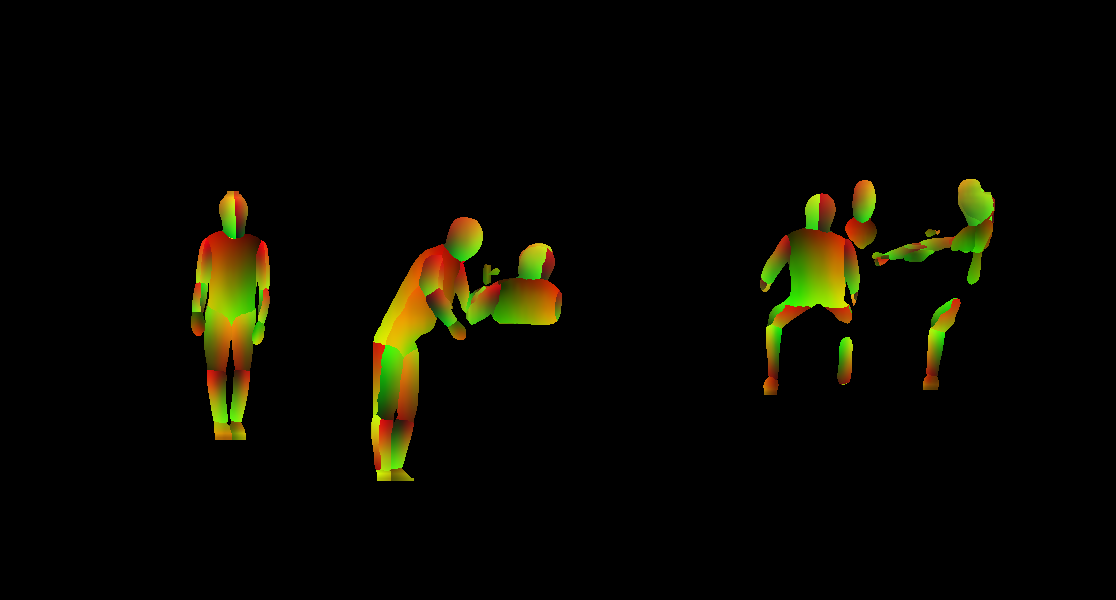

In [98]:
from IPython.display import Image,display_png
display_png(Image('DensePoseData/infer_out/demo_im_IUV.png'))

In [0]:
!pwd

/content/densepose


In [0]:
!make ops

mkdir -p build && cd build && cmake .. && make -j2
CMake Error at CMakeLists.txt:8 (find_package):
  By not providing "FindCaffe2.cmake" in CMAKE_MODULE_PATH this project has
  asked CMake to find a package configuration file provided by "Caffe2", but
  CMake did not find one.

  Could not find a package configuration file provided by "Caffe2" with any
  of the following names:

    Caffe2Config.cmake
    caffe2-config.cmake

  Add the installation prefix of "Caffe2" to CMAKE_PREFIX_PATH or set
  "Caffe2_DIR" to a directory containing one of the above files.  If "Caffe2"
  provides a separate development package or SDK, be sure it has been
  installed.


-- Configuring incomplete, errors occurred!
See also "/content/densepose/build/CMakeFiles/CMakeOutput.log".
Makefile:13: recipe for target 'ops' failed
make: *** [ops] Error 1


In [0]:
!python2 -c 'from caffe2.python import workspace; print(workspace.NumCudaDevices())'

1


In [0]:
!python2 ./detectron/tests/test_spatial_narrow_as_op.py

[E init_intrinsics_check.cc:43] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
Traceback (most recent call last):
  File "./detectron/tests/test_spatial_narrow_as_op.py", line 80, in <module>
    c2_utils.import_detectron_ops()
  File "/content/densepose/detectron/utils/c2.py", line 33, in import_detectron_ops
    detectron_ops_lib = envu.get_detectron_ops_lib()
  File "/content/densepose/detectron/utils/env.py", line 63, in get_detectron_ops_lib
    ('Detectron ops lib not found; make sure that your Caffe2 '
AssertionError: Detectron ops lib n

In [0]:
!printenv

CUDNN_VERSION=7.4.1.5
__EGL_VENDOR_LIBRARY_DIRS=/usr/lib64-nvidia:/usr/share/glvnd/egl_vendor.d/
LD_LIBRARY_PATH=/usr/lib64-nvidia
_=/usr/bin/printenv
LANG=en_US.UTF-8
HOSTNAME=fb66eb90a800
OLDPWD=/
CLOUDSDK_CONFIG=/content/.config
NVIDIA_VISIBLE_DEVICES=all
DATALAB_SETTINGS_OVERRIDES={"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=\"172.28.0.2\""]}
ENV=/root/.bashrc
PAGER=cat
NCCL_VERSION=2.3.7
TF_FORCE_GPU_ALLOW_GROWTH=true
JPY_PARENT_PID=38
PWD=/content/densepose
HOME=/root
CLICOLOR=1
DEBIAN_FRONTEND=noninteractive
COLAB_USE_SEABORN_STYLE=1
GLIBCPP_FORCE_NEW=1
TERM=xterm-color
SHELL=/bin/bash
MPLBACKEND=module://ipykernel.pylab.backend_inline
CUDA_PKG_VERSION=9-2=9.2.148-1
CUDA_VERSION=9.2.148
NVIDIA_DRIVER_CAPABILITIES=compute,utility
SHLVL=2
PYTHONPATH=/env/python
NVIDIA_REQUIRE_CUDA=cuda>=9.2
COLAB_GPU=1
GLIBCXX_FORCE_NEW=1
PATH=/usr/local/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbi

In [0]:
%env PYTHONPATH=/env/python:/content/caffe/build
%env LD_LIBRARY_PATH=/usr/local/lib:/usr/lib64-nvidia

env: PYTHONPATH=/env/python:/content/caffe/build
env: LD_LIBRARY_PATH=/usr/local/lib:/usr/lib64-nvidia


In [0]:
%env Caffe2_DIR=/content/caffe/

env: Caffe2_DIR=/content/caffe/


In [0]:
!printenv

CUDNN_VERSION=7.4.1.5
__EGL_VENDOR_LIBRARY_DIRS=/usr/lib64-nvidia:/usr/share/glvnd/egl_vendor.d/
LD_LIBRARY_PATH=/usr/local/lib:$LD_LIBRARY_PATH
_=/usr/bin/printenv
LANG=en_US.UTF-8
HOSTNAME=fb66eb90a800
OLDPWD=/
CLOUDSDK_CONFIG=/content/.config
Caffe2_DIR=/content/caffe/
NVIDIA_VISIBLE_DEVICES=all
DATALAB_SETTINGS_OVERRIDES={"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=\"172.28.0.2\""]}
ENV=/root/.bashrc
PAGER=cat
NCCL_VERSION=2.3.7
TF_FORCE_GPU_ALLOW_GROWTH=true
JPY_PARENT_PID=38
PWD=/content/detectron
HOME=/root
CLICOLOR=1
DEBIAN_FRONTEND=noninteractive
COLAB_USE_SEABORN_STYLE=1
GLIBCPP_FORCE_NEW=1
TERM=xterm-color
SHELL=/bin/bash
MPLBACKEND=module://ipykernel.pylab.backend_inline
CUDA_PKG_VERSION=9-2=9.2.148-1
CUDA_VERSION=9.2.148
NVIDIA_DRIVER_CAPABILITIES=compute,utility
SHLVL=2
PYTHONPATH=$PYTHONPATH:/content/caffe/build
NVIDIA_REQUIRE_CUDA=cuda>=9.2
COLAB_GPU=1
GLIBCXX_FORCE_NEW=1
PATH=/usr/local/bin:/usr/local/nvidia/bin:/usr/local/c

In [0]:
!ls /content/caffe/build


boost_1_67_0	      CMakeCache.txt	    include		  matlab
boost_1_67_0.tar.bz2  CMakeFiles	    __init__.py		  python
CaffeConfig.cmake     cmake_install.cmake   install		  src
caffe_config.h	      detect_cuda_archs.cu  install_manifest.txt  test
CaffeTargets.cmake    docs		    lib			  tools
cmake		      examples		    Makefile


In [0]:
!ls

build		    CONTRIBUTING.md	INSTALL.md    PoseTrack
challenge	    DensePoseData	LICENSE       README.md
cmake		    detectron		Makefile      requirements.txt
CMakeLists.txt	    Detectron.egg-info	MODEL_ZOO.md  setup.py
CODE_OF_CONDUCT.md  docker		notebooks     tools
configs		    GETTING_STARTED.md	NOTICE


In [0]:
%cd /content/

/content


# Detectronのインストールが必要！

In [76]:
%cd /content

/content


In [77]:
!git clone https://github.com/facebookresearch/detectron

Cloning into 'detectron'...
remote: Enumerating objects: 1279, done.
remote: Total 1279 (delta 0), reused 0 (delta 0), pack-reused 1279
Receiving objects: 100% (1279/1279), 4.22 MiB | 21.07 MiB/s, done.
Resolving deltas: 100% (825/825), done.


In [78]:
%cd /content/detectron

/content/detectron


In [79]:
!pip install -r ./requirements.txt

In [80]:
!make

python setup.py develop --user
Compiling detectron/utils/cython_bbox.pyx because it changed.
Compiling detectron/utils/cython_nms.pyx because it changed.
[1/2] Cythonizing detectron/utils/cython_bbox.pyx
/usr/local/lib/python2.7/dist-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/detectron/detectron/utils/cython_bbox.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/2] Cythonizing detectron/utils/cython_nms.pyx
/usr/local/lib/python2.7/dist-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/detectron/detectron/utils/cython_nms.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running develop
running egg_info
creating Detectron.egg-info
writing Detectron.egg-info/PKG-INFO
writing top-level names to Detectron.egg-info/top_level.txt
w

In [81]:
!python ./detectron/tests/test_spatial_narrow_as_op.py

[E init_intrinsics_check.cc:43] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
Found Detectron ops lib: /usr/local/lib/python2.7/dist-packages/torch/lib/libcaffe2_detectron_ops_gpu.so
...
----------------------------------------------------------------------
Ran 3 tests in 3.834s

OK


In [0]:
!ls /content/detectron/detectron/utils

blob.py		 coordinator.pyc  __init__.py		  net.pyc
blob.pyc	 cython_bbox.c	  __init__.pyc		  segms.py
boxes.py	 cython_bbox.pyx  io.py			  segms.pyc
boxes.pyc	 cython_bbox.so   io.pyc		  subprocess.py
c2.py		 cython_nms.c	  keypoints.py		  subprocess.pyc
c2.pyc		 cython_nms.pyx   keypoints.pyc		  timer.py
collections.py	 cython_nms.so	  logging.py		  timer.pyc
collections.pyc  env.py		  logging.pyc		  training_stats.py
colormap.py	 env.pyc	  lr_policy.py		  train.py
colormap.pyc	 image.py	  model_convert_utils.py  vis.py
coordinator.py	 image.pyc	  net.py		  vis.pyc


In [0]:
!ls /content/densepose/detectron/utils

blob.py		 cython_nms.pyx		lr_policy.py
blob.pyc	 cython_nms.so		model_convert_utils.py
boxes.py	 densepose_methods.py	net.py
boxes.pyc	 densepose_methods.pyc	net.pyc
c2.py		 env.py			segms.py
c2.pyc		 env.pyc		segms.pyc
collections.py	 image.py		subprocess.py
collections.pyc  image.pyc		subprocess.pyc
colormap.py	 __init__.py		timer.py
colormap.pyc	 __init__.pyc		timer.pyc
coordinator.py	 io.py			training_stats.py
coordinator.pyc  io.pyc			train.py
cython_bbox.c	 keypoints.py		vis.py
cython_bbox.pyx  keypoints.pyc		vis.pyc
cython_bbox.so	 logging.py
cython_nms.c	 logging.pyc


In [0]:
!cp /content/detectron/detectron/utils/*.so /content/densepose/detectron/utils/

In [0]:
%cd ..

/content/densepose


In [0]:
!make ops

mkdir -p build && cd build && cmake .. && make -j2
CMake Error at CMakeLists.txt:8 (find_package):
  By not providing "FindCaffe2.cmake" in CMAKE_MODULE_PATH this project has
  asked CMake to find a package configuration file provided by "Caffe2", but
  CMake did not find one.

  Could not find a package configuration file provided by "Caffe2" with any
  of the following names:

    Caffe2Config.cmake
    caffe2-config.cmake

  Add the installation prefix of "Caffe2" to CMAKE_PREFIX_PATH or set
  "Caffe2_DIR" to a directory containing one of the above files.  If "Caffe2"
  provides a separate development package or SDK, be sure it has been
  installed.


-- Configuring incomplete, errors occurred!
See also "/content/densepose/build/CMakeFiles/CMakeOutput.log".
Makefile:13: recipe for target 'ops' failed
make: *** [ops] Error 1


In [0]:
!pwd

/content/densepose/detectron


In [0]:
!pip list

Package                            Version               Location          
---------------------------------- --------------------- ------------------
absl-py                            0.6.1                 
albumentations                     0.1.9                 
altair                             2.3.0                 
astor                              0.7.1                 
astropy                            2.0.11                
atari-py                           0.1.7                 
atomicwrites                       1.2.1                 
attrs                              18.2.0                
audioread                          2.1.6                 
autograd                           1.2                   
backports-abc                      0.5                   
backports.functools-lru-cache      1.5                   
backports.shutil-get-terminal-size 1.0.0                 
backports.tempfile                 1.0                   
backports.weakref                  1

In [0]:
!pip uninstall detectron

Uninstalling Detectron-0.0.0:
  Would remove:
    /root/.local/lib/python2.7/site-packages/Detectron.egg-link
Proceed (y/n)? y
  Successfully uninstalled Detectron-0.0.0


In [0]:
!pip install detectron